In [1]:
import cv2
import tensorflow as tf
import os
import sys
import numpy as np
import PIL
import matplotlib.pyplot as plt

In [2]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [3]:
data_dir = 'gtsrb'

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
EPOCHS = 30
IMG_WIDTH = 30
IMG_HEIGHT = 30
NUM_CATEGORIES = 43
TEST_SIZE = 0.4

In [6]:
import pathlib
data_dir = pathlib.Path(data_dir)
image_count = len(list(data_dir.glob('*/*.ppm')))
print(image_count)

26640


In [7]:
sign1 = list(data_dir.glob('0/*'))
PIL.Image.open(str(sign1[0]))

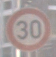

In [8]:
sign2 = list(data_dir.glob('1/*'))
PIL.Image.open(str(sign2[0]))

In [9]:
sign3 = list(data_dir.glob('2/*'))
PIL.Image.open(str(sign3[0]))

In [10]:
def load_data(data_dir):
    """
    Load image data from directory `data_dir`.

    Assume `data_dir` has one directory named after each category, numbered
    0 through NUM_CATEGORIES - 1. Inside each category directory will be some
    number of image files.

    Return tuple `(images, labels)`. `images` should be a list of all
    of the images in the data directory, where each image is formatted as a
    numpy ndarray with dimensions IMG_WIDTH x IMG_HEIGHT x 3. `labels` should
    be a list of integer labels, representing the categories for each of the
    corresponding `images`.
    """
    images = list()
    labels = list()
    for category in range(NUM_CATEGORIES):
        categories = os.path.join(data_dir, str(category))
        for img in os.listdir(categories):
            image_file = os.path.join(categories, img)
            image = cv2.imread(image_file)
            image = cv2.resize(image, (IMG_HEIGHT,IMG_WIDTH))
            images.append(image)
            labels.append(category)

    return images, labels

In [11]:
# Get image arrays and labels for all image files
images, labels = load_data(data_dir)

# Split data into training and testing sets
labels = tf.keras.utils.to_categorical(labels)

x_train, x_test, y_train, y_test = train_test_split(
    np.array(images), np.array(labels), test_size=TEST_SIZE
)



In [12]:
model = Sequential()

In [13]:
model.add(layers.Conv2D(32, 3, activation='relu', input_shape=(IMG_HEIGHT,IMG_WIDTH, 3)))

In [14]:
model.add(layers.MaxPooling2D((2,2)))

In [15]:
model.add(layers.Conv2D(64, 3, activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

In [16]:
model.add(layers.Conv2D(64, 3, activation='relu'))

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 12, 12, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
Total params: 56,320
Trainable params: 56,320
Non-trainable params: 0
_________________________________________________________________


In [18]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(NUM_CATEGORIES, activation='softmax'))

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 12, 12, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                6

In [20]:
model.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [21]:
# Fit model on training data
history = model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs=EPOCHS, steps_per_epoch=60)

Epoch 1/30
60/60 [==============================] - 6s 105ms/step - loss: 4.6120 - accuracy: 0.1096 - val_loss: 3.3172 - val_accuracy: 0.1864
Epoch 2/30
60/60 [==============================] - 5s 88ms/step - loss: 2.9958 - accuracy: 0.2315 - val_loss: 2.6127 - val_accuracy: 0.2986
Epoch 3/30
60/60 [==============================] - 5s 90ms/step - loss: 2.1209 - accuracy: 0.4197 - val_loss: 1.6544 - val_accuracy: 0.5503
Epoch 4/30
60/60 [==============================] - 5s 87ms/step - loss: 1.3187 - accuracy: 0.6346 - val_loss: 1.0562 - val_accuracy: 0.7162
Epoch 5/30
60/60 [==============================] - 5s 88ms/step - loss: 0.7985 - accuracy: 0.7879 - val_loss: 0.6534 - val_accuracy: 0.8291
Epoch 6/30
60/60 [==============================] - 5s 88ms/step - loss: 0.4790 - accuracy: 0.8736 - val_loss: 0.5214 - val_accuracy: 0.8483
Epoch 7/30
60/60 [==============================] - 5s 87ms/step - loss: 0.3309 - accuracy: 0.9098 - val_loss: 0.3187 - val_accuracy: 0.9191
Epoch 8/30
6

In [22]:
# Evaluate neural network performance
model.evaluate(x_test,  y_test, verbose=2)

333/333 - 2s - loss: 0.1176 - accuracy: 0.9810


[0.11759761720895767, 0.9810435175895691]

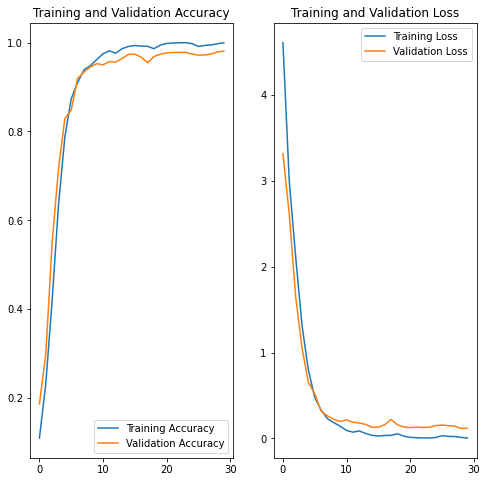

In [23]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(EPOCHS)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()